In [1]:
#Import Statements for all the libraries needed

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
#Reading the data from the computer 
data = pd.read_csv('.\master.csv')


#Display top five rows of the data 
data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#To get what type of data we are dealing with.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
#Prints the number of columns and Columns

print("(Rows,columns) : "+ str(data.shape))

(Rows,columns) : (27820, 12)


In [5]:
#prints the total number of Not A Number occurences for a particular attribute

data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
#We replace the NAN with a zero to get a better data consistency and hence better results

data=data.fillna(0)
data.isna().sum()


country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [7]:
# .unique() :- displays all the unique values associated with a attribute
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [8]:
data['country'].unique()


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [9]:
# .nunique() : - displays total  number of unique values associated with a attribute

data['country'].nunique()


101

In [10]:
data['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [11]:
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

mean_value=data['suicides_no'].mean()
data['suicides_no']=data['suicides_no'].fillna(mean_value)

def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ",data['year'][high_index])
    print("Year Which Has Lowest "+ x + "  : ",data['year'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,20996,3
country,Russian Federation,Albania
year,1994,1987
sex,male,male
age,35-54 years,75+ years
suicides_no,22338.0,1.0
population,19044200,21800
suicides/100k pop,117.3,4.59
country-year,Russian Federation1994,Albania1987
HDI for year,0.0,0.0
gdp_for_year ($),"395,077,301,248","2,156,624,900"


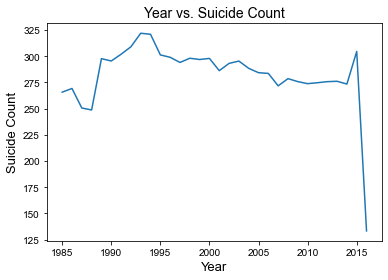

In [12]:
data.groupby('year')['suicides_no'].mean().plot()
plt.title("Year vs. Suicide Count",fontsize = 14) 
plt.xlabel('Year',fontsize = 13) 
plt.ylabel('Suicide Count',fontsize = 13)  #setup the figure size. sns.set(rc={'figure.figsize':(10,5)}) 
sns.set_style("whitegrid")

In [13]:
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",data['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",data['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,3,20996
country,Albania,Russian Federation
year,1987,1994
sex,male,male
age,75+ years,35-54 years
suicides_no,1.0,22338.0
population,21800,19044200
suicides/100k pop,4.59,117.3
country-year,Albania1987,Russian Federation1994
HDI for year,0.0,0.0
gdp_for_year ($),"2,156,624,900","395,077,301,248"


In [14]:
data['suicide_per_pop'] = data['suicides_no']/data['population']
data.tail(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_per_pop
27817,Uzbekistan,2014,male,5-14 years,60.0,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0.000022
27818,Uzbekistan,2014,female,5-14 years,44.0,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0.000017
27819,Uzbekistan,2014,female,55-74 years,21.0,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers,0.000015


In [15]:
find_minmax('suicide_per_pop')

Country Which Has Highest suicide_per_pop :  Kiribati
Country Which Has Lowest suicide_per_pop  :  Thailand


,25061,14059
country,Thailand,Kiribati
year,1994,1991
sex,male,male
age,5-14 years,75+ years
suicides_no,1.0,286.691023
population,5821000,278
suicides/100k pop,0.02,0.0
country-year,Thailand1994,Kiribati1991
HDI for year,0.0,0.0
gdp_for_year ($),"146,683,499,006","47,515,189"


In [16]:
sample = data.sample(3)
sample

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_per_pop
27155,United States,2010,female,25-34 years,1092.0,20180858,5.41,United States2010,0.909,"14,964,372,000,000",51989,Generation X,0.000054
4709,Bulgaria,1998,female,15-24 years,35.0,594600,5.89,Bulgaria1998,0.000,"14,630,992,956",1852,Generation X,0.000059
13643,Japan,2008,male,25-34 years,2651.0,8234000,32.20,Japan2008,0.000,"5,037,908,465,114",41773,Generation X,0.000322


In [17]:
# grabs first 2 chars from Age Column
data['AgeNum'] = data['age'].str[:2]

# remove all instances of dash -
data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))

# now, convert it to type int (not Object)
data['AgeNum'] = data['AgeNum'].astype(int)

data['AgeNum'].tail(3)

27817     5
27818     5
27819    55
Name: AgeNum, dtype: int32

In [18]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"
# Map each row in the Col to the AgeGroup Method
data['AgeCategory'] = data['AgeNum'].map(lambda x: AgeGroup(x))
# convert it back to type String
data['AgeCategory'] = data['AgeCategory'].astype(str)
data['AgeCategory'].tail(3)

27817            Adolescent
27818            Adolescent
27819    Middle_Aged_Adults
Name: AgeCategory, dtype: object

In [19]:
data['AgeNum'] .tail(3)

27817     5
27818     5
27819    55
Name: AgeNum, dtype: int32

In [20]:
data.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_per_pop,AgeNum,AgeCategory
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,0.0,"2,156,624,900",796,Generation X,0.000067,15,Adolescent
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,0.0,"2,156,624,900",796,Silent,0.000052,35,Middle_Aged_Adults
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,0.0,"2,156,624,900",796,Generation X,0.000048,15,Adolescent


Text(4.050000000000004, 0.5, 'Suicide Count')

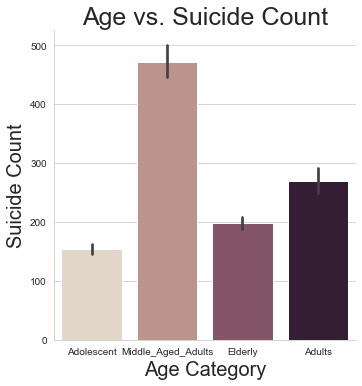

In [21]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=data);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

In [22]:
# there is an equal number of Males & Females in our data
data['sex'].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

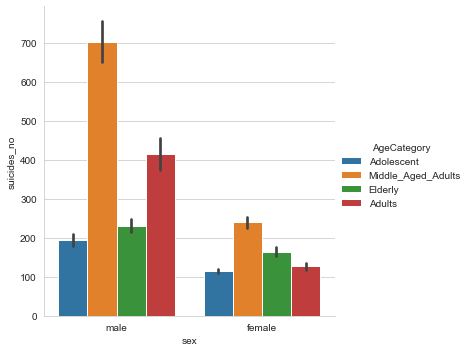

In [23]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=data);

In [24]:
newData= data.loc[:,['year','sex','AgeNum','suicides_no']]
newData.head(3)
X = newData.iloc[:, :-1].values 
y = newData.iloc[:, -1].values 

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.predict([[1,0,2001,55]]))

[196.02734375]
